In [1]:
%run auxStandardStructure.ipynb

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## Preprocessing

In [3]:
all_releases_df = pd.read_csv('all_releases.csv')

In [4]:
X, y = generateStandardTimeSeriesStructure(all_releases_df, 3)

Generating a new dataframe without containing the last release...
... DONE!
checking class larger than window size...
DONE
Setting the features...
DONE
X: (110841, 24) y: (110841,)


In [5]:
print("Declaring a dictionary to save results...")
results_dict = dict()
print("... DONE!")

print("Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("General information:")
print("X Train set:", X_train.shape[0], "X Test set:", X_test.shape[0])
print("y Train set:", y_train.shape[0], "y Test set:", y_test.shape[0])
print("... DONE!")

print("Scaling features...")
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
print("... DONE!")

print("Setting stratified k-fold...")
k=10
kf = StratifiedKFold(n_splits=k, shuffle=False, random_state=42)
print("k =", k)
print("... DONE!\n")

Declaring a dictionary to save results...
... DONE!
Splitting dataset into train and test sets...
General information:
X Train set: 77588 X Test set: 33253
y Train set: 77588 y Test set: 33253
... DONE!
Scaling features...
... DONE!
Setting stratified k-fold...
k = 10
... DONE!



In [6]:
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

## Statistical Analysis

In [7]:
all_releases_df.describe()

,CountClassCoupled,CountDeclMethod,CountDeclMethodAll,CountClassDerived,CountLineCode,SumCyclomatic,PercentLackOfCohesion,MaxInheritanceTree,class_frequency,will_change,number_of_changes,release
count,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000
mean,5.747073,6.513707,10.989669,0.273352,103.106062,13.787349,20.578522,1.651251,11.395915,0.174707,27.325105,32.741315
std,8.658830,12.084357,17.917928,2.303381,754.576185,31.166179,30.626505,0.740645,10.388216,0.379718,15.532635,11.367734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000,0.000000,12.000000,2.000000,0.000000,1.000000,3.000000,0.000000,17.000000,25.000000
50%,3.000000,3.000000,4.000000,0.000000,32.000000,5.000000,0.000000,2.000000,8.000000,0.000000,31.000000,35.000000
75%,7.000000,6.000000,13.000000,0.000000,82.000000,13.000000,45.000000,2.000000,18.000000,0.000000,40.000000,42.000000
max,145.000000,294.000000,294.000000,116.000000,45517.000000,843.000000,100.000000,6.000000,49.000000,1.000000,49.000000,49.000000


0
False    63065
True     14523
Name: 0, dtype: int64

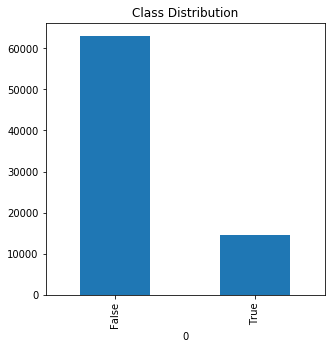

In [8]:
ax = y_train.groupby([0])[0].count().plot.bar(title="Class Distribution", figsize=(5,5))
y_train.groupby([0])[0].count()

In [9]:
X_train.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.0,0.065,0.49,0.43,0.58,-0.022,0.34,0.55,0.98,0.064,0.48,0.43,0.58,-0.019,0.33,0.54,0.98,0.064,0.48,0.42,0.58,-0.019,0.33,0.54
1,0.065,1.0,0.2,0.17,0.13,-0.03,0.17,0.11,0.063,0.98,0.19,0.16,0.12,-0.03,0.17,0.11,0.063,0.98,0.19,0.16,0.12,-0.03,0.17,0.11
2,0.49,0.2,1.0,0.8,0.83,-0.19,0.68,0.86,0.48,0.19,0.99,0.8,0.83,-0.18,0.67,0.85,0.48,0.19,0.99,0.79,0.83,-0.18,0.67,0.84
3,0.43,0.17,0.8,1.0,0.67,0.16,0.54,0.68,0.42,0.16,0.8,0.99,0.67,0.16,0.54,0.67,0.42,0.16,0.79,0.99,0.67,0.16,0.54,0.67
4,0.58,0.13,0.83,0.67,1.0,-0.16,0.6,0.9,0.58,0.12,0.83,0.67,0.99,-0.16,0.6,0.89,0.57,0.12,0.83,0.67,0.99,-0.16,0.6,0.88
5,-0.022,-0.03,-0.19,0.16,-0.16,1.0,-0.2,-0.14,-0.02,-0.03,-0.18,0.16,-0.16,0.98,-0.19,-0.13,-0.018,-0.03,-0.18,0.16,-0.16,0.98,-0.19,-0.13
6,0.34,0.17,0.68,0.54,0.6,-0.2,1.0,0.6,0.33,0.17,0.67,0.54,0.6,-0.19,0.98,0.59,0.33,0.17,0.67,0.54,0.6,-0.19,0.98,0.59
7,0.55,0.11,0.86,0.68,0.9,-0.14,0.6,1.0,0.54,0.11,0.85,0.67,0.9,-0.13,0.6,0.98,0.54,0.11,0.85,0.67,0.89,-0.13,0.6,0.98
8,0.98,0.063,0.48,0.42,0.58,-0.02,0.33,0.54,1.0,0.063,0.48,0.43,0.58,-0.019,0.34,0.54,0.99,0.062,0.48,0.42,0.58,-0.018,0.33,0.54
9,0.064,0.98,0.19,0.16,0.12,-0.03,0.17,0.11,0.063,1.0,0.19,0.16,0.12,-0.03,0.17,0.11,0.062,0.98,0.19,0.16,0.12,-0.03,0.17,0.11


## Imbalanced baseline

In [10]:
%%time
LogisticRegr_(X_train, y_train, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6888606602895154
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6984401364851932
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6970349203972777
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6970514854936206
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7085960066234509
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6980807338150994
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7125140558775191
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6952148419582032
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7001242421621281
10 of KFold 10
ROC AUC score: 0.6993654213617886

CROSS VALIDANTION SUMMARY:
Mean: 0.6995282504463796
Std deviation: 0.006318784634043854

TEST SET:
F1-Score(micro): 0.7387904850690163
F1-Score(macro): 0.6540052382141333
F1-Score(weighted): 0.7615049579825718
F1-Score(None): [0.82528061 0.48272987]
Accuracy: 0.7387904850690163
Sensitivity: 0.6546599903085124
Specificity: 0.7580370999926096
Confusion Matrix: [0.7580370999926096, 0.65]
ROC AUC score: 0.706348545150561
CPU times: user 28.2 s, sys: 13.5 s, total: 41.7 s
Wall time: 5.27 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [11]:
%%time
DecisionTree_(X_train, y_train, X_test, y_test)

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 4.77 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.812578165315393
2 of KFold 10
ROC AUC score: 0.8020743728415024
3 of KFold 10
ROC AUC score: 0.8047192672339619
4 of KFold 10
ROC AUC score: 0.8105955776977873
5 of KFold 10
ROC AUC score: 0.8084403572749854
6 of KFold 10
ROC AUC score: 0.8158807825683528
7 of KFold 10
ROC AUC score: 0.8094127854096714
8 of KFold 10
ROC AUC score: 0.8196368800014678
9 of KFold 10
ROC AUC score: 0.8121970942012461
10 of KFold 10
ROC AUC score: 0.8048614988217964

CROSS VALIDANTION SUMMARY:
Mean: 0.8100396781366165
Std deviation: 0.005090671797665162

TEST SET:
F1-Score(micro): 0.8702974167744264
F1-Score(macro): 0.7893690459099314
F1-Score(weighted): 0.8713143218808646
F1-Score(None): [0.91992945 0.65880864]
Accuracy: 0.8702974167744264
Sensitivity: 0.6725892424487159
Specificity: 0.9155273076638829
Confusion Matrix: [0.9155273076638829, 0.67]
ROC AUC score: 0.794058

In [12]:
%%time
RandomForest_(X_train, y_train, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8039665449994876
2 of KFold 10
ROC AUC score: 0.8047340532390025
3 of KFold 10
ROC AUC score: 0.8054222844847012
4 of KFold 10
ROC AUC score: 0.8080093568692096
5 of KFold 10
ROC AUC score: 0.8000298435294904
6 of KFold 10
ROC AUC score: 0.8115762110334379
7 of KFold 10
ROC AUC score: 0.8181710059683419
8 of KFold 10
ROC AUC score: 0.8027295269099611
9 of KFold 10
ROC AUC score: 0.8098816423031457
10 of KFold 10
ROC AUC score: 0.80503351130892

CROSS VALIDANTION SUMMARY:
Mean: 0.8069553980645697
Std deviation: 0.004924921336558082

TEST SET:
F1-Score(micro): 0.9052717048085887
F1-Score(macro): 0.8332840221655593
F1-Score(weighted): 0.902043114401277
F1-Score(None): [0.94283537 0.72373268]
Accuracy: 0.9052717048085887
Sensitivity: 0.6664513002745921
Specificity: 0.9599068804966373
Confusion Matrix: [0.9599068804966373, 0.67]
ROC AUC score: 0.81317909038

In [13]:
%%time
NN_(X_train, y_train, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7218099903416286
2 of KFold 10
ROC AUC score: 0.7016639766322195
3 of KFold 10
ROC AUC score: 0.744415336808281
4 of KFold 10
ROC AUC score: 0.7108427340997213
5 of KFold 10
ROC AUC score: 0.7158742570784746
6 of KFold 10
ROC AUC score: 0.7166954337073703
7 of KFold 10
ROC AUC score: 0.7281406531363281
8 of KFold 10
ROC AUC score: 0.710019055707145
9 of KFold 10
ROC AUC score: 0.7121667544749458
10 of KFold 10
ROC AUC score: 0.7391917182376485

CROSS VALIDANTION SUMMARY:
Mean: 0.7200819910223764
Std deviation: 0.012817550322906261

TEST SET:
F1-Score(micro): 0.881574594773404
F1-Score(macro): 0.7802332501854528
F1-Score(weighted): 0.8739002801174809
F1-Score(None): [0.9294695 0.630997 ]
Accuracy: 0.8815745947734039
Sensitivity: 0.5438539815861735
Specificity: 0.9588352671642895
Confusion Matrix: [0.9588352671642895, 0.54]
ROC AUC score: 0.751344624375

## Undersampling

In [14]:
print("Resampling dataset using Random UnderSampling (RUS)...")
X_RUS, y_RUS = RandomUnderSampler(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y RUS:", len(X_RUS), len(y_RUS))

Resampling dataset using Random UnderSampling (RUS)...
... DONE!
X and Y RUS: 29046 29046


In [15]:
%%time
LogisticRegr_(X_RUS, y_RUS, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6754196357152888
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6884429874863011
3 of KFold 10
ROC AUC score: 0.6993898703978334
4 of KFold 10
ROC AUC score: 0.6896497151715183
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7149644554667831
6 of KFold 10
ROC AUC score: 0.6941233494902223
7 of KFold 10
ROC AUC score: 0.7001055770190154
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7074574842686437
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.696194558545527
10 of KFold 10
ROC AUC score: 0.6839287563425495

CROSS VALIDANTION SUMMARY:
Mean: 0.6949676389903683
Std deviation: 0.010857598038131654

TEST SET:
F1-Score(micro): 0.7363245421465733
F1-Score(macro): 0.6513704495892876
F1-Score(weighted): 0.7593860978234094
F1-Score(None): [0.82346783 0.47927307]
Accuracy: 0.7363245421465733
Sensitivity: 0.6517525440155064
Specificity: 0.7556721602246693
Confusion Matrix: [0.7556721602246693, 0.65]
ROC AUC score: 0.7037123521200879
CPU times: user 11.1 s, sys: 6.23 s, total: 17.3 s
Wall time: 2.19 s


In [16]:
%%time
DecisionTree_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 11 µs, sys: 5 µs, total: 16 µs
Wall time: 5.01 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7579462121350894
2 of KFold 10
ROC AUC score: 0.7679151693554553
3 of KFold 10
ROC AUC score: 0.7825085434263976
4 of KFold 10
ROC AUC score: 0.7606507019227802
5 of KFold 10
ROC AUC score: 0.7706596719139857
6 of KFold 10
ROC AUC score: 0.76286701208981
7 of KFold 10
ROC AUC score: 0.7789913334029446
8 of KFold 10
ROC AUC score: 0.761238128569762
9 of KFold 10
ROC AUC score: 0.7756383220322486
10 of KFold 10
ROC AUC score: 0.7602752177464821

CROSS VALIDANTION SUMMARY:
Mean: 0.7678690312594956
Std deviation: 0.008266766552086925

TEST SET:
F1-Score(micro): 0.8545093675758577
F1-Score(macro): 0.7581595957359847
F1-Score(weighted): 0.8539676898838713
F1-Score(None): [0.91080712 0.60551207]
Accuracy: 0.8545093675758578
Sensitivity: 0.5997415603295105
Specificity: 0.912792846057202
Confusion Matrix: [0.912792846057202, 0.6]
ROC AUC score: 0.75626720319

In [17]:
%%time
RandomForest_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7476026268066166
2 of KFold 10
ROC AUC score: 0.7387614050513547
3 of KFold 10
ROC AUC score: 0.7382898639499645
4 of KFold 10
ROC AUC score: 0.7294536943033513
5 of KFold 10
ROC AUC score: 0.7354135697700236
6 of KFold 10
ROC AUC score: 0.7466410384979664
7 of KFold 10
ROC AUC score: 0.7494448505099023
8 of KFold 10
ROC AUC score: 0.7376512126774613
9 of KFold 10
ROC AUC score: 0.7547602637561593
10 of KFold 10
ROC AUC score: 0.7408765086926006

CROSS VALIDANTION SUMMARY:
Mean: 0.7418895034015401
Std deviation: 0.007185230275964755

TEST SET:
F1-Score(micro): 0.8778756803897393
F1-Score(macro): 0.7740704679613502
F1-Score(weighted): 0.8701893050772733
F1-Score(None): [0.92721309 0.62092784]
Accuracy: 0.8778756803897393
Sensitivity: 0.5372314650298821
Specificity: 0.955805188086616
Confusion Matrix: [0.955805188086616, 0.54]
ROC AUC score: 0.7465183265

In [18]:
%%time
NN_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7077692904202769
2 of KFold 10
ROC AUC score: 0.7242279289955909
3 of KFold 10
ROC AUC score: 0.7041548455735379
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7164945720767593
5 of KFold 10
ROC AUC score: 0.7397105256225467
6 of KFold 10
ROC AUC score: 0.7169981614574629
7 of KFold 10
ROC AUC score: 0.7264801085935053
8 of KFold 10
ROC AUC score: 0.7320931572468996
9 of KFold 10
ROC AUC score: 0.7118987009225768
10 of KFold 10
ROC AUC score: 0.6898967933450691

CROSS VALIDANTION SUMMARY:
Mean: 0.7169724084254225
Std deviation: 0.013772239065961476

TEST SET:
F1-Score(micro): 0.8805822031094938
F1-Score(macro): 0.7624040817703928
F1-Score(weighted): 0.8675761596515278
F1-Score(None): [0.9299709  0.59483726]
Accuracy: 0.8805822031094939
Sensitivity: 0.4708447746729123
Specificity: 0.9743182322075234
Confusion Matrix: [0.9743182322075234, 0.47]
ROC AUC score: 0.7225815034402179
CPU times: user 14min 31s, sys: 7min 15s, total: 21min 46s
Wall time: 2min 43s


In [19]:
print("Resampling dataset using Edited Nearest Neighbour (ENN)...")
X_ENN, y_ENN = EditedNearestNeighbours(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y ENN:", len(X_ENN), len(y_ENN))

Resampling dataset using Edited Nearest Neighbour (ENN)...
... DONE!
X and Y ENN: 69921 69921


In [20]:
%%time
LogisticRegr_(X_ENN, y_ENN, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.687123228128755
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7076612010975394
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6846329939734364
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7047121420976352
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7018203998859279
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6990712241071337
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.70225303638891
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.695691794217773
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7148454158216883
10 of KFold 10
ROC AUC score: 0.6977282078410627

CROSS VALIDANTION SUMMARY:
Mean: 0.6995539643559863
Std deviation: 0.008568696729726922

TEST SET:
F1-Score(micro): 0.7392415721889755
F1-Score(macro): 0.6542342684344391
F1-Score(weighted): 0.7618390377612785
F1-Score(None): [0.82567701 0.48279153]
Accuracy: 0.7392415721889755
Sensitivity: 0.653690841544177
Specificity: 0.758813095853965
Confusion Matrix: [0.758813095853965, 0.65]
ROC AUC score: 0.706251968699071
CPU times: user 26.1 s, sys: 12.2 s, total: 38.3 s
Wall time: 4.82 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [21]:
%%time
DecisionTree_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 12 µs, sys: 5 µs, total: 17 µs
Wall time: 5.01 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8081237571645805
2 of KFold 10
ROC AUC score: 0.8048313307665074
3 of KFold 10
ROC AUC score: 0.8081592651102919
4 of KFold 10
ROC AUC score: 0.8053172668211667
5 of KFold 10
ROC AUC score: 0.8142315451482408
6 of KFold 10
ROC AUC score: 0.8161957321295075
7 of KFold 10
ROC AUC score: 0.8009121725788191
8 of KFold 10
ROC AUC score: 0.8173272106107429
9 of KFold 10
ROC AUC score: 0.8172811671375728
10 of KFold 10
ROC AUC score: 0.8127770608572055

CROSS VALIDANTION SUMMARY:
Mean: 0.8105156508324635
Std deviation: 0.005533443063719946

TEST SET:
F1-Score(micro): 0.8752593750939764
F1-Score(macro): 0.7965013265368568
F1-Score(weighted): 0.8759598865714505
F1-Score(None): [0.92309974 0.66990291]
Accuracy: 0.8752593750939764
Sensitivity: 0.6798578581812308
Specificity: 0.919961569728771
Confusion Matrix: [0.919961569728771, 0.68]
ROC AUC score: 0.7999097

In [22]:
%%time
RandomForest_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7972654297685003
2 of KFold 10
ROC AUC score: 0.8052697380067269
3 of KFold 10
ROC AUC score: 0.7963822333391843
4 of KFold 10
ROC AUC score: 0.8054799887694095
5 of KFold 10
ROC AUC score: 0.8030250219166218
6 of KFold 10
ROC AUC score: 0.8077186304638867
7 of KFold 10
ROC AUC score: 0.7897478545539669
8 of KFold 10
ROC AUC score: 0.8128665431073222
9 of KFold 10
ROC AUC score: 0.8038456043290414
10 of KFold 10
ROC AUC score: 0.8114089893824508

CROSS VALIDANTION SUMMARY:
Mean: 0.8033010033637111
Std deviation: 0.006735996113871255

TEST SET:
F1-Score(micro): 0.9042492406700148
F1-Score(macro): 0.831249687371183
F1-Score(weighted): 0.9009115079052197
F1-Score(None): [0.94223931 0.72026006]
Accuracy: 0.9042492406700148
Sensitivity: 0.6620901308350832
Specificity: 0.9596482152095189
Confusion Matrix: [0.9596482152095189, 0.66]
ROC AUC score: 0.810869173

In [23]:
%%time
NN_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7243193648379929
2 of KFold 10
ROC AUC score: 0.732170516905647
3 of KFold 10
ROC AUC score: 0.7272083991574514
4 of KFold 10
ROC AUC score: 0.746299959339341
5 of KFold 10
ROC AUC score: 0.7173864824614214
6 of KFold 10
ROC AUC score: 0.7118403426520252
7 of KFold 10
ROC AUC score: 0.7120795047777269
8 of KFold 10
ROC AUC score: 0.7205405620265888
9 of KFold 10
ROC AUC score: 0.7330274797001484
10 of KFold 10
ROC AUC score: 0.7140705236102873

CROSS VALIDANTION SUMMARY:
Mean: 0.7238943135468631
Std deviation: 0.010488476273658879

TEST SET:
F1-Score(micro): 0.8841909000691667
F1-Score(macro): 0.7791679074650242
F1-Score(weighted): 0.8747520204355919
F1-Score(None): [0.93145857 0.62687724]
Accuracy: 0.8841909000691667
Sensitivity: 0.5225327087707963
Specificity: 0.9669277954327101
Confusion Matrix: [0.9669277954327101, 0.52]
ROC AUC score: 0.744730252

In [24]:
print("Resampling dataset using Tomek's Link (TL)...")
X_TL, y_TL = TomekLinks(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y TL:", len(X_TL), len(y_TL))

Resampling dataset using Tomek's Link (TL)...
... DONE!
X and Y TL: 76065 76065


In [25]:
%%time
LogisticRegr_(X_TL, y_TL, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6897674655386659
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6960975387311796
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6975953354075662
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6956390369588419
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7120919634205425
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6962913351175202
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7072440351099677
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6970240359877785
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7034170511959605
10 of KFold 10
ROC AUC score: 0.7013303179506686

CROSS VALIDANTION SUMMARY:
Mean: 0.6996498115418691
Std deviation: 0.006150253833134452

TEST SET:
F1-Score(micro): 0.7393919345622951
F1-Score(macro): 0.6545292575869233
F1-Score(weighted): 0.7619965794213377
F1-Score(None): [0.82575301 0.48330551]
Accuracy: 0.7393919345622951
Sensitivity: 0.6546599903085124
Specificity: 0.7587761436700909
Confusion Matrix: [0.7587761436700909, 0.65]
ROC AUC score: 0.7067180669893017
CPU times: user 29.4 s, sys: 14.3 s, total: 43.7 s
Wall time: 5.56 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [26]:
%%time
DecisionTree_(X_TL, y_TL, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.77 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8076367982487603
2 of KFold 10
ROC AUC score: 0.8032319931902385
3 of KFold 10
ROC AUC score: 0.8099290571297463
4 of KFold 10
ROC AUC score: 0.819379007703515
5 of KFold 10
ROC AUC score: 0.8089034623660512
6 of KFold 10
ROC AUC score: 0.8075352036977319
7 of KFold 10
ROC AUC score: 0.8181562284865395
8 of KFold 10
ROC AUC score: 0.8180886409105105
9 of KFold 10
ROC AUC score: 0.8065317356253776
10 of KFold 10
ROC AUC score: 0.8105725330422071

CROSS VALIDANTION SUMMARY:
Mean: 0.8109964660400678
Std deviation: 0.005301098506463033

TEST SET:
F1-Score(micro): 0.878537274832346
F1-Score(macro): 0.7988476134019026
F1-Score(weighted): 0.8783126360351937
F1-Score(None): [0.92545632 0.6722389 ]
Accuracy: 0.878537274832346
Sensitivity: 0.6690356969794864
Specificity: 0.9264651540906067
Confusion Matrix: [0.9264651540906067, 0.67]
ROC AUC score: 0.79

In [27]:
%%time
RandomForest_(X_TL, y_TL, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8035662303222716
2 of KFold 10
ROC AUC score: 0.8124060716849004
3 of KFold 10
ROC AUC score: 0.8083946311767156
4 of KFold 10
ROC AUC score: 0.8088324914429623
5 of KFold 10
ROC AUC score: 0.7951062329001368
6 of KFold 10
ROC AUC score: 0.8083806712474884
7 of KFold 10
ROC AUC score: 0.8138125475560708
8 of KFold 10
ROC AUC score: 0.8022217492084934
9 of KFold 10
ROC AUC score: 0.8092321922941801
10 of KFold 10
ROC AUC score: 0.8101493742373556

CROSS VALIDANTION SUMMARY:
Mean: 0.8072102192070576
Std deviation: 0.005228662920806921

TEST SET:
F1-Score(micro): 0.9060535891498511
F1-Score(macro): 0.8352780293689333
F1-Score(weighted): 0.9030468373786381
F1-Score(None): [0.94325159 0.72730447]
Accuracy: 0.9060535891498511
Sensitivity: 0.6729122920368277
Specificity: 0.9593895499224004
Confusion Matrix: [0.9593895499224004, 0.67]
ROC AUC score: 0.81615092

In [28]:
%%time
NN_(X_TL, y_TL, X_test, y_test)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7166604959840426
2 of KFold 10
ROC AUC score: 0.70967245205608
3 of KFold 10
ROC AUC score: 0.7361200065765096
4 of KFold 10
ROC AUC score: 0.7168877101454333
5 of KFold 10
ROC AUC score: 0.7380525838605791
6 of KFold 10
ROC AUC score: 0.7182256022549477
7 of KFold 10
ROC AUC score: 0.711915173557013
8 of KFold 10
ROC AUC score: 0.7071799014604393
9 of KFold 10
ROC AUC score: 0.7152803600259207
10 of KFold 10
ROC AUC score: 0.71854411093444

CROSS VALIDANTION SUMMARY:
Mean: 0.7188538396855406
Std deviation: 0.009784543372799761

TEST SET:
F1-Score(micro): 0.8834090157279043
F1-Score(macro): 0.7740145435926482
F1-Score(weighted): 0.8726993649937085
F1-Score(None): [0.93124546 0.61678363]
Accuracy: 0.8834090157279042
Sensitivity: 0.5039573574543692
Specificity: 0.970216539797502
Confusion Matrix: [0.970216539797502, 0.5]
ROC AUC score: 0.737086948625935

## Oversampling

In [29]:
print("Resampling dataset using Random OverSampling (ROS)...")
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)
print("X and Y ROS:", len(X_ROS), len(y_ROS))

Resampling dataset using Random OverSampling (ROS)...
X and Y ROS: 126130 126130


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
%%time
LogisticRegr_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.696527667670842
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.699540193435865
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7002536863802126
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6977960995719042
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7011257333121927
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7015540754836664
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7055978433238186
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.703615604186489
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6994925467808436
10 of KFold 10
ROC AUC score: 0.6964795432921027

CROSS VALIDANTION SUMMARY:
Mean: 0.7001982993437939
Std deviation: 0.0027845792370089924

TEST SET:
F1-Score(micro): 0.7391814272396474
F1-Score(macro): 0.6542911816391861
F1-Score(weighted): 0.7618129874364449
F1-Score(None): [0.82560174 0.48298063]
Accuracy: 0.7391814272396475
Sensitivity: 0.6543369407204006
Specificity: 0.7585913827507206
Confusion Matrix: [0.7585913827507206, 0.65]
ROC AUC score: 0.7064641617355606
CPU times: user 51.7 s, sys: 24.8 s, total: 1min 16s
Wall time: 9.69 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [31]:
%%time
DecisionTree_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.967654986522911
2 of KFold 10
ROC AUC score: 0.9682099254796257
3 of KFold 10
ROC AUC score: 0.9701125733312193
4 of KFold 10
ROC AUC score: 0.9698747423497701
5 of KFold 10
ROC AUC score: 0.9722530521642619
6 of KFold 10
ROC AUC score: 0.9754995242626072
7 of KFold 10
ROC AUC score: 0.9731208372978116
8 of KFold 10
ROC AUC score: 0.9748652077386615
9 of KFold 10
ROC AUC score: 0.9723279416428798
10 of KFold 10
ROC AUC score: 0.972882968601332

CROSS VALIDANTION SUMMARY:
Mean: 0.971680175939108
Std deviation: 0.0025092550401472707

TEST SET:
F1-Score(micro): 0.8783869124590262
F1-Score(macro): 0.8023983164996702
F1-Score(weighted): 0.8793081650166052
F1-Score(None): [0.92493596 0.67986067]
Accuracy: 0.8783869124590262
Sensitivity: 0.6935874656759813
Specificity: 0.9206636612223782
Confusion Matrix: [0.9206636612223782, 0.69]
ROC AUC score: 0.807125563

In [32]:
%%time
RandomForest_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.9648010147455208
2 of KFold 10
ROC AUC score: 0.9655937846836848
3 of KFold 10
ROC AUC score: 0.9669414935785636
4 of KFold 10
ROC AUC score: 0.9670207705723798
5 of KFold 10
ROC AUC score: 0.9712224512446488
6 of KFold 10
ROC AUC score: 0.970662860767523
7 of KFold 10
ROC AUC score: 0.9707421503330161
8 of KFold 10
ROC AUC score: 0.971535045987948
9 of KFold 10
ROC AUC score: 0.9679670155407548
10 of KFold 10
ROC AUC score: 0.969394227719632

CROSS VALIDANTION SUMMARY:
Mean: 0.9685880815173672
Std deviation: 0.002325515495501093

TEST SET:
F1-Score(micro): 0.9060535891498511
F1-Score(macro): 0.8487944793603936
F1-Score(weighted): 0.9071952456417683
F1-Score(None): [0.94184228 0.75574668]
Accuracy: 0.9060535891498511
Sensitivity: 0.7806493296721047
Specificity: 0.9347424432783977
Confusion Matrix: [0.9347424432783977, 0.78]
ROC AUC score: 0.8576958

In [33]:
%%time
NN_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8183764071666402
2 of KFold 10
ROC AUC score: 0.8211511019502139
3 of KFold 10
ROC AUC score: 0.825590613603932
4 of KFold 10
ROC AUC score: 0.8244014586966862
5 of KFold 10
ROC AUC score: 0.8202790550182336
6 of KFold 10
ROC AUC score: 0.8210434506818902
7 of KFold 10
ROC AUC score: 0.8203298445924516
8 of KFold 10
ROC AUC score: 0.8212813193783698
9 of KFold 10
ROC AUC score: 0.8235807167776721
10 of KFold 10
ROC AUC score: 0.8296860133206471

CROSS VALIDANTION SUMMARY:
Mean: 0.8225719981186737
Std deviation: 0.003130411631299758

TEST SET:
F1-Score(micro): 0.7768020930442365
F1-Score(macro): 0.7115591594870536
F1-Score(weighted): 0.7976600299437065
F1-Score(None): [0.84874052 0.5743778 ]
Accuracy: 0.7768020930442366
Sensitivity: 0.808916168631885
Specificity: 0.7694553248096963
Confusion Matrix: [0.7694553248096963, 0.81]
ROC AUC score: 0.789185746

In [34]:
print("Resampling dataset using SMOTE (SMO)...")
sm = SMOTE(random_state=42)
X_SMO, y_SMO = sm.fit_resample(X_train, y_train)
print("X and Y SMO:", len(X_SMO), len(y_SMO))

Resampling dataset using SMOTE (SMO)...


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X and Y SMO: 126130 126130


In [35]:
%%time
LogisticRegr_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6962105596955763
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6991438084667829
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7054859679720946
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6941493578563501
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.694942127794514
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6989375198223914
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7099587694259435
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6983824928639392
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6944973041547733
10 of KFold 10
ROC AUC score: 0.6979860450364732

CROSS VALIDANTION SUMMARY:
Mean: 0.6989693953088839
Std deviation: 0.00481287179241334

TEST SET:
F1-Score(micro): 0.7372567888611554
F1-Score(macro): 0.6528890240081631
F1-Score(weighted): 0.7602965889860088
F1-Score(None): [0.82401756 0.48176048]
Accuracy: 0.7372567888611554
Sensitivity: 0.6559521886609595
Specificity: 0.7558569211440396
Confusion Matrix: [0.7558569211440396, 0.66]
ROC AUC score: 0.7059045549024995
CPU times: user 50.8 s, sys: 23.5 s, total: 1min 14s
Wall time: 9.39 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [36]:
%%time
DecisionTree_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.77 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8558744252417948
2 of KFold 10
ROC AUC score: 0.8615823687965752
3 of KFold 10
ROC AUC score: 0.9200095132392578
4 of KFold 10
ROC AUC score: 0.9476771840811796
5 of KFold 10
ROC AUC score: 0.9479150150626289
6 of KFold 10
ROC AUC score: 0.9452901998097051
7 of KFold 10
ROC AUC score: 0.9495718363463368
8 of KFold 10
ROC AUC score: 0.9475895972090073
9 of KFold 10
ROC AUC score: 0.9476688867745005
10 of KFold 10
ROC AUC score: 0.9456073580716776

CROSS VALIDANTION SUMMARY:
Mean: 0.9268786384632663
Std deviation: 0.035061951807813116

TEST SET:
F1-Score(micro): 0.7090187351517157
F1-Score(macro): 0.6464056119691507
F1-Score(weighted): 0.7397950562586749
F1-Score(None): [0.79519959 0.49761163]
Accuracy: 0.7090187351517157
Sensitivity: 0.7740268131158132
Specificity: 0.6941467740743478
Confusion Matrix: [0.6941467740743478, 0.77]
ROC AUC score: 0

In [37]:
%%time
RandomForest_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.34 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8908355795148248
2 of KFold 10
ROC AUC score: 0.8933724433169494
3 of KFold 10
ROC AUC score: 0.9459330902172189
4 of KFold 10
ROC AUC score: 0.9634533058506423
5 of KFold 10
ROC AUC score: 0.9687648644363406
6 of KFold 10
ROC AUC score: 0.9665398033618776
7 of KFold 10
ROC AUC score: 0.9668569616238504
8 of KFold 10
ROC AUC score: 0.9688392007611799
9 of KFold 10
ROC AUC score: 0.9637646685696163
10 of KFold 10
ROC AUC score: 0.967649857278782

CROSS VALIDANTION SUMMARY:
Mean: 0.9496009774931284
Std deviation: 0.02944280772444368

TEST SET:
F1-Score(micro): 0.707785763690494
F1-Score(macro): 0.6614853611345386
F1-Score(weighted): 0.7400620160170681
F1-Score(None): [0.78667867 0.53629205]
Accuracy: 0.7077857636904941
Sensitivity: 0.9076078178000323
Specificity: 0.6620722784716577
Confusion Matrix: [0.6620722784716577, 0.91]
ROC AUC score: 0.7848400

In [38]:
%%time
NN_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.812906294593309
2 of KFold 10
ROC AUC score: 0.8091802758839385
3 of KFold 10
ROC AUC score: 0.8200412240367846
4 of KFold 10
ROC AUC score: 0.8171872522593944
5 of KFold 10
ROC AUC score: 0.8075947360076106
6 of KFold 10
ROC AUC score: 0.813907389787504
7 of KFold 10
ROC AUC score: 0.8226292419917539
8 of KFold 10
ROC AUC score: 0.8177925784966698
9 of KFold 10
ROC AUC score: 0.8120837297811607
10 of KFold 10
ROC AUC score: 0.815651760228354

CROSS VALIDANTION SUMMARY:
Mean: 0.814897448306648
Std deviation: 0.0044644217782490985

TEST SET:
F1-Score(micro): 0.7636303491414308
F1-Score(macro): 0.7007084923582174
F1-Score(weighted): 0.7868396704865344
F1-Score(None): [0.83793814 0.56347884]
Accuracy: 0.7636303491414308
Sensitivity: 0.8194152802455177
Specificity: 0.7508683763210405
Confusion Matrix: [0.7508683763210405, 0.82]
ROC AUC score: 0.785141

In [39]:
print("Resampling dataset using ADASYN (ADA)...")
ada = ADASYN(random_state=42)
X_ADA, y_ADA = ada.fit_resample(X_train, y_train)
print("X and Y ADA:", len(X_ADA), len(y_ADA))

Resampling dataset using ADASYN (ADA)...


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X and Y ADA: 125191 125191


In [40]:
%%time
LogisticRegr_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6984207966688402
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7013780339718952
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6789672074472856
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6581560842406804
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.671440805579814
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6754120645410172
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6746895913069636
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6702806728084681
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6700895966984499
10 of KFold 10
ROC AUC score: 0.6748756639543816

CROSS VALIDANTION SUMMARY:
Mean: 0.6773710517217795
Std deviation: 0.012437464966901951

TEST SET:
F1-Score(micro): 0.7280546116139897
F1-Score(macro): 0.6485233300335373
F1-Score(weighted): 0.7534605773382296
F1-Score(None): [0.815716   0.48133066]
Accuracy: 0.7280546116139898
Sensitivity: 0.6777580358585042
Specificity: 0.7395610080555761
Confusion Matrix: [0.7395610080555761, 0.68]
ROC AUC score: 0.7086595219570402
CPU times: user 47.1 s, sys: 21.8 s, total: 1min 8s
Wall time: 8.7 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [41]:
%%time
DecisionTree_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.53 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8587693051219011
2 of KFold 10
ROC AUC score: 0.8561315746472965
3 of KFold 10
ROC AUC score: 0.9158834602415987
4 of KFold 10
ROC AUC score: 0.937352558253151
5 of KFold 10
ROC AUC score: 0.9372757949512358
6 of KFold 10
ROC AUC score: 0.940588416632937
7 of KFold 10
ROC AUC score: 0.9395170719165038
8 of KFold 10
ROC AUC score: 0.9393656916449731
9 of KFold 10
ROC AUC score: 0.9404684445909403
10 of KFold 10
ROC AUC score: 0.9426164617187119

CROSS VALIDANTION SUMMARY:
Mean: 0.920796877971925
Std deviation: 0.03247895387655808

TEST SET:
F1-Score(micro): 0.6281538507803807
F1-Score(macro): 0.5791014165245679
F1-Score(weighted): 0.6692858206254372
F1-Score(None): [0.72278893 0.43541391]
Accuracy: 0.6281538507803807
Sensitivity: 0.770150218058472
Specificity: 0.5956692040499594
Confusion Matrix: [0.5956692040499594, 0.77]
ROC AUC score: 0.6829

In [42]:
%%time
RandomForest_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.58 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.897739083425249
2 of KFold 10
ROC AUC score: 0.8981486620868477
3 of KFold 10
ROC AUC score: 0.9468620843926248
4 of KFold 10
ROC AUC score: 0.9599604352550674
5 of KFold 10
ROC AUC score: 0.9656899684885115
6 of KFold 10
ROC AUC score: 0.9638639049548205
7 of KFold 10
ROC AUC score: 0.9640158372865794
8 of KFold 10
ROC AUC score: 0.965366159519782
9 of KFold 10
ROC AUC score: 0.9614076802946692
10 of KFold 10
ROC AUC score: 0.9643173980197316

CROSS VALIDANTION SUMMARY:
Mean: 0.9487371213723884
Std deviation: 0.02592092086698394

TEST SET:
F1-Score(micro): 0.7002075000751812
F1-Score(macro): 0.6555099599572177
F1-Score(weighted): 0.7333929420746009
F1-Score(None): [0.77959806 0.53142186]
Accuracy: 0.7002075000751812
Sensitivity: 0.9130996607979325
Specificity: 0.6515039538836745
Confusion Matrix: [0.6515039538836745, 0.91]
ROC AUC score: 0.782

In [43]:
%%time
NN_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8005001404732697
2 of KFold 10
ROC AUC score: 0.8026514141456443
3 of KFold 10
ROC AUC score: 0.8034947896781227
4 of KFold 10
ROC AUC score: 0.7632542954592438
5 of KFold 10
ROC AUC score: 0.783060630937688
6 of KFold 10
ROC AUC score: 0.7680031725014751
7 of KFold 10
ROC AUC score: 0.7690884395711399
8 of KFold 10
ROC AUC score: 0.7697838442889763
9 of KFold 10
ROC AUC score: 0.7788574450196043
10 of KFold 10
ROC AUC score: 0.7705911376628194

CROSS VALIDANTION SUMMARY:
Mean: 0.7809285309737984
Std deviation: 0.014912075072731045

TEST SET:
F1-Score(micro): 0.731452801251015
F1-Score(macro): 0.6755696446907604
F1-Score(weighted): 0.7600807207409793
F1-Score(None): [0.81021805 0.54092124]
Accuracy: 0.731452801251015
Sensitivity: 0.8497819415280246
Specificity: 0.7043825290074643
Confusion Matrix: [0.7043825290074643, 0.85]
ROC AUC score: 0.7770822352